# Project Machine Learning - Sprint 3 - Part 2: External data

Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn


# Division of labor ##

We did this entire project once again together with pair programming.
We got together virtualy and worked together, looking for solutions. Everyone did about a third of the work.

Imports of the right libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
from math import radians, cos, sin, asin, sqrt

Importing all useful external data we have collected. All data is downloaded from: https://data.stad.gent/explore/?disjunctive.keyword&disjunctive.theme&sort=modified

In [2]:

data = pd.read_csv('data/listings.csv')

musea = pd.read_csv('ExternalData/locaties-musea-gent.csv', delimiter=';')
busses = pd.read_csv('ExternalData/bushaltes-gent.csv', delimiter=';')
cafes = pd.read_csv('ExternalData/cafes-gent.csv', delimiter=';')
restos = pd.read_csv('ExternalData/koop-lokaal-horeca.csv', delimiter=';')
winkels = pd.read_csv('ExternalData/koop-lokaal-winkels.csv', delimiter=';')
bomen = pd.read_csv('ExternalData/locaties-bomen-gent.csv', delimiter=';')
parkings = pd.read_csv('ExternalData/locaties-openbare-parkings-gent.csv', delimiter=';')


This cell shows how the data from the parkings in Ghent looks like.

In [3]:
parkings.head(5)

,Geometry,parking,naam,url,type,parkingregime,straatnaam,huisnr,eigenaar,capaciteit,urid,dashboard,geo_point_2d
0,"{""coordinates"": [3.723184835346397, 51.0488857...",P4,Savaanstraat,https://stad.gent/node/36391,Parking,NaN,Savaanstraat,13,NaN,588.0,mob/parking1066,False,"51.0488857177,3.72318483535"
1,"{""coordinates"": [3.725948412486469, 51.0420987...",P10,Sint-Pietersplein,https://stad.gent/node/36394,Parking,NaN,Sint-Pietersplein,65,NaN,708.0,mob/parking1070,False,"51.0420987198,3.72594841249"
2,"{""coordinates"": [3.756416392314891, 51.0350957...",P+R,Gentbrugge,https://stad.gent/node/34591,Park and Ride,Tijdelijk buiten gebruik,Land van Rodelaan,NaN,NaN,0.0,mob/parking1072,False,"51.0350957269,3.75641639231"
3,"{""coordinates"": [3.678370760430587, 51.0762393...",P+R,Mariakerke Post,https://stad.gent/node/34598,Park and Ride,NaN,Brugsesteenweg,NaN,NaN,25.0,mob/parking1075,False,"51.07623931,3.67837076043"
4,"{""coordinates"": [3.704960084356771, 51.0870903...",P+R,Neptunus,https://stad.gent/node/36642/,Park and Ride,NaN,NaN,NaN,NaN,148.0,mob/parking1084,False,"51.0870903518,3.70496008436"


# Data preprocessing

First visual look of the given listings, this part is almost identical as in the previous sprints.

In [4]:
data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


Shifting the wrong listings like in the first sprint.

In [5]:
data_cleaned = data
shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]

for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + ", " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]

data_cleaned = pd.concat([data_cleaned, shifted])

data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

data_cleaned

C:\Users\noot\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


In [6]:
data_cleaned['longitude'] = data_cleaned['longitude'].astype(float)
data_cleaned['latitude'] = data_cleaned['latitude'].astype(float)


We will need this method to calculate the distance between two coordinates in the next part of this notebook.  
Calculate the great circle distance between two points on the earth (specified in decimal degrees)

In [7]:

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


Formatting the price column.

In [8]:
data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\noot\AppData\Local\Temp/ipykernel_6320/4124887726.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


The most important features we want to use are listed below. The amenities are only necessary for the part about parkings, this column will be dropped after that. And next we drop all the columns that we won't use in this sprint.

In [9]:
features = [
    'id',
    'longitude',
    'latitude',
    'amenities',
    'price',
]

In [10]:
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['id', 'latitude', 'longitude', 'amenities', 'price'], dtype='object')

# Open data

### Musea  
We calculated the average distance from the listing to all musea in Ghent. All the musea are located in the center of Ghent so this distance indicates if a listing is in the center or not.

In [11]:
def distance_to_loc(place, row):
    distance = 0
    for i in range(place.shape[0]):
        distance += haversine(place.loc[i, 'x'], place.loc[i, 'y'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])
    distance /= place.shape[0]
    return distance

In [12]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'avg_distance_to_musea'] = distance_to_loc(musea, i)

### Busses  
We calculated if there is a bus stop in the close neighbourhood of the listing. We investigated multiple radii like 100, 200, 500 meters or 1 kilometer.

In [13]:
def places_in_neighbourhood(place, threshold, row):
    for i in range(place.shape[0]):
        if haversine(place.loc[i, 'longitude'], place.loc[i, 'latitude'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            return True
    return False

In [14]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'bus_within_100m'] = places_in_neighbourhood(busses, 0.1, i)
    data_cleaned.loc[i, 'bus_within_200m'] = places_in_neighbourhood(busses, 0.2, i)
    data_cleaned.loc[i, 'bus_within_500m'] = places_in_neighbourhood(busses, 0.5, i)
    data_cleaned.loc[i, 'bus_within_1000m'] = places_in_neighbourhood(busses, 1, i)   
    

### Cafes  
We calculated the number of cafes in the radius of 1.5 kilometer from the listing. 

In [15]:
def number_of_places_in_neighbourhood(place, threshold, row):
    aantal = 0
    for i in range(place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        if haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            aantal += 1
    return aantal

In [16]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_cafes_within_1500m'] = number_of_places_in_neighbourhood(cafes, 1.5, i)

### Restos  
We calculated the number of restos in the 1.5 km radius of the listing.  
Because there were no coordinates given, we had to calculate the coordinates based on the address of the restaurants using Geopy.  
Ref: https://geopy.readthedocs.io/en/stable/

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MLProjectSprint3")


If Geopy can't find the coordinates of the address or the address doesn't exist, we set the longitude and the latitude to 0.0. In this way we won't include this restaurant to our calculations because the distance will be more than 1.5 kilometer, but we won't lose the data of the restaurants. 

In [18]:
for i in range(restos.shape[0]):
    try:
        location = geolocator.geocode(restos.loc[i, 'Adres'] + ', ' + str(restos.loc[i, 'Postcode']) + ' ' + restos.loc[i, 'Gemeente'])
        if location is None:
            restos.loc[i, 'longitude'] = 0.0
            restos.loc[i, 'latitude'] = 0.0
        else: 
            restos.loc[i, 'longitude'] = location.longitude
            restos.loc[i, 'latitude'] = location.latitude
    except Exception as e:
        print(e)
        restos.loc[i, 'longitude'] = 0.0
        restos.loc[i, 'latitude'] = 0.0


Checking the calculated longitude and latitude.

In [20]:
restos.head(15)

,Naam,Aanbod,Keuken,Dieet,Take-away opties,Tekstveld,Adres,Postcode,Gemeente,Telefoonnummer,...,Image URL,E-mail,Column 15,Column 16,Column 17,Omschrijving voor paasactie,Link.1,image_path,longitude,latitude
0,8tea5 Ghent,Dranken;Zoet,Belgisch,NaN,NaN,"Bubble Tea, (Iced) Coffees en taartjes",Sint-Niklaasstraat 34,9000,Gent,0468113785,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://ghent.8tea5.shop,https://stad.gent/sites/default/files/koop_lok...,3.722964,51.053039
1,Aba-Jour,Brasserie keuken,Belgisch;Italiaans;Frans,NaN,NaN,"Gentse klassiekers zoals stoverij, ballen in t...",Oudburg 20,9000,Gent,0486562048,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.abajour-gent.com,https://stad.gent/sites/default/files/koop_lok...,3.724151,51.058065
2,Alice Gent,Ontbijt en brunch;Lunch;Zoet,Belgisch,NaN,NaN,"Ontbijtmanden,lunchboxes,quiches en patisserie",Onderbergen 6,9000,Gent,09 277 92 35,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.alice-gent.be,https://stad.gent/sites/default/files/koop_lok...,3.719513,51.052738
3,Alix - Table & Jardin d'Amis,Ontbijt en brunch;Lunch;Kindvriendelijk,Belgisch,NaN,NaN,"Afhaalmenu (voor-, hoofdgerecht en dessert) op...",Kortrijksesteenweg 206,9000,Gent,093289438,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://alixtablejardin.be/takeaway,https://stad.gent/sites/default/files/koop_lok...,3.715770,51.038931
4,Amfora,Brasserie keuken;Lunch;Zoet;Zomerwedstrijd,Belgisch,NaN,NaN,Huisgemaakte gerechten en drankjes. Van dagver...,Korte Kruisstraat 1,9000,Gent,0475286815,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://www.amfora-gent.com/,https://stad.gent/sites/default/files/media/im...,3.725045,51.052445
5,Amour,Dranken;Lunch;Ontbijt en brunch;Kindvriendelijk,Belgisch,Vegetarisch,NaN,Lunch - brunch - apero - diner,Sint Salvatorstraat 18A,9000,Gent,09 352 05 70,...,https://data.stad.gent/api/v2/catalog/datasets...,amour.restaurant9000@gmail.com,NaN,NaN,NaN,NaN,http://www.amourgent.be/,https://stad.gent/sites/default/files/webform/...,3.729057,51.064673
6,Anar Persian Cuisine,Dranken;BBQ en grill;Lunch;Zoet;Zomerwedstrijd,Midden-Oosters,NaN,NaN,"Grillades, smaakvolle stoofschotels, ruim aanb...",Sluizeken 15,9000,Gent,09 2736353,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.anar.be,https://stad.gent/sites/default/files/koop_lok...,3.724592,51.059698
7,Aperto chiuso,Pasta,Italiaans,NaN,NaN,"Pasta, Italiaanse keuken",Sleepstraat 82,9000,Gent,0494422373,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.apertochiuso.be/afhalen,https://stad.gent/sites/default/files/koop_lok...,3.726594,51.061323
8,Babbelut,Dranken;Gastronomisch;Lunch;Pasta;Kindvriendelijk,Belgisch,Vegetarisch,NaN,Hier staan Gentse gerechten centraal. Alles wo...,Vrijdagmarkt 15,9000,Gent,0498 34 91 88,...,https://data.stad.gent/api/v2/catalog/datasets...,babbelutgent@gmail.com,NaN,NaN,NaN,NaN,http://www.babbelutgent.com/,https://stad.gent/sites/default/files/webform/...,3.725689,51.057554
9,Bar Baudelo,Brasserie keuken;Kindvriendelijk,Belgisch,Vegetarisch,NaN,Bar Baudelo is de brasserie van het Industriem...,Minnemeers 10,9000,Gent,0493 09 40 08,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,barbaudelo.be,https://stad.gent/sites/default/files/webform/...,3.729154,51.059380


In [21]:
def number_of_places_in_neighbourhood_lonlat(place, threshold, row):
    aantal = 0
    for i in range(place.shape[0]):
        if haversine(place.loc[i, 'longitude'], place.loc[i, 'latitude'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            aantal += 1
    return aantal

In [22]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_restos_within_1500m'] = number_of_places_in_neighbourhood_lonlat(restos, 1.5, i)

### Shops  
We calculated the number of shops in the neighbourhood of the listing and used the radii of 1 km, 2 km and 3 km.  
We calculated the coordinates for the shops with Geopy as well.

In [23]:
for i in range(winkels.shape[0]):
    try:
        location = geolocator.geocode(winkels.loc[i, 'Adres'] + ', ' + str(int(winkels.loc[i, 'Postcode'])) + ' ' + winkels.loc[i, 'Gemeente'])
        if location is None:
            # zeker niet binnen anderhalve kilometer
            winkels.loc[i, 'longitude'] = 0.0
            winkels.loc[i, 'latitude'] = 0.0
        else: 
            winkels.loc[i, 'longitude'] = location.longitude
            winkels.loc[i, 'latitude'] = location.latitude
    except Exception as e:
        print(e)
        winkels.loc[i, 'longitude'] = 0.0
        winkels.loc[i, 'latitude'] = 0.0

cannot convert float NaN to integer
unsupported operand type(s) for +: 'float' and 'str'
cannot convert float NaN to integer
unsupported operand type(s) for +: 'float' and 'str'
unsupported operand type(s) for +: 'float' and 'str'


Checking the shops we won't include in the calculations.

In [41]:
winkels[winkels['longitude'] == 0.0]

,Naam,Image URL,Aanbod,tekstveld (250 karakters),Hoe kan je winkelen,Adres,Postcode,Gemeente,Telefoonnummer,Link,E-mail,Column 12,Column 13,Cityzine,Column 15,Omschrijving,Link.1,image_path,longitude,latitude
2,Apotheek Callebaut,NaN,Beauty,Apotheek met huisbereidingen en gespecialiseer...,NaN,Clarissenstraat nummer 1,9000.0,Gent,0922252931,info@apotheekcallebaut.be,info@apotheekcallebaut.be,92252931,NaN,NaN,NaN,NaN,info@apotheekcallebaut.be,NaN,0.0,0.0
7,Auto Product Coppens,https://data.stad.gent/api/v2/catalog/datasets...,Fiets en auto,Auo-onderdelen winkel. Alles voor uw wagen voo...,NaN,Brusselsestzenweg 11,9050.0,Ledeberg,092310521,http://www.gramat.be,NaN,NaN,NaN,NaN,NaN,NaN,http://www.gramat.be,https://stad.gent/sites/default/files/webform/...,0.0,0.0
25,cacaOh! Artisanale Chocolade,https://data.stad.gent/api/v2/catalog/datasets...,Dranken en voeding,Artisanale chocolade gemaakt in ons atelier in...,NaN,Booiebos 6d,NaN,Drongen,092279111,http://www.cacaoh.be/,info@cacaoh.be,92279111,NaN,NaN,NaN,NaN,http://www.cacaoh.be/,https://stad.gent/sites/default/files/webform/...,0.0,0.0
62,Jewellerydesign Marie-Bénédicte,https://data.stad.gent/api/v2/catalog/datasets...,Juwelen,Bij Jewellerydesign Marie-Bénédicte kan je ter...,NaN,Eehout 16,9000.0,Gent,09 324 56 45,https://www.mariebenedicte.com,info@mariebenedicte.com,09 324 56 45,NaN,NaN,NaN,NaN,https://www.mariebenedicte.com,https://stad.gent/sites/default/files/webform/...,0.0,0.0
64,Juwelier Christiaan Van Bignoot,https://data.stad.gent/api/v2/catalog/datasets...,Juwelen,"Juwelier met unieke, persoonlijke aanpak.\r\nI...",NaN,NaN,NaN,NaN,NaN,https://www.christiaanvanbignoot.com,christiaan@vanbignoot.com,478641113,NaN,NaN,NaN,NaN,https://www.christiaanvanbignoot.com,https://stad.gent/sites/default/files/webform/...,0.0,0.0
101,TiaTia,https://data.stad.gent/api/v2/catalog/datasets...,Kinderen;Kleding,"TiaTia is een no-nonsense, online kinderboetie...",NaN,Galgalaan 29,9000.0,Gent,NaN,https://www.tiatia.be/,info@tiatia.be,494844684,NaN,NaN,NaN,NaN,https://www.tiatia.be/,https://communicatie-digitaal.gent.be/kooploka...,0.0,0.0
108,Vlask Gallery,https://data.stad.gent/api/v2/catalog/datasets...,Wonen,Wie Vlask Gallery binnenstapt waant zich in ee...,NaN,Vlaskmarkt 1,9000.0,Gent,0476/666.535,https://https://www.vlask.be,info@vlask.be,0476/666.535,NaN,NaN,NaN,NaN,https://https://www.vlask.be,https://stad.gent/sites/default/files/webform/...,0.0,0.0
161,Fietsen Wildiers-PDG,https://data.stad.gent/api/v2/catalog/datasets...,Fietsen en auto's,Aanbod van alle topmerken fietsen zowel te Dro...,NaN,Brugsesteenweg 652 Mariakerke en Baarledorpstr...,NaN,Gent,0476/201.164,https://www.fietsenwildiers.be,patrick.degeyter@fietsenwildiers.be,NaN,NaN,NaN,NaN,NaN,https://www.fietsenwildiers.be,https://stad.gent/sites/default/files/webform/...,0.0,0.0
198,Petit Bazaar,https://data.stad.gent/api/v2/catalog/datasets...,Accessoires;Kinderen;Kleding;Speelgoed;Wonen,"Welkom in de virtuele wereld van Petit Bazaar,...",NaN,NaN,9000.0,Gent,NaN,http://petitbazaar.be,NaN,NaN,NaN,NaN,NaN,NaN,http://petitbazaar.be,https://stad.gent/sites/default/files/webform/...,0.0,0.0
200,Pili Pili Ethnics,https://data.stad.gent/api/v2/catalog/datasets...,Juwelen,Originele antieke en hedendaagse ethnische sie...,NaN,"Penshuisjes 5/6, Groentenmarkt",9000.0,Gent,0475685376,https://www.pili-piliethnics.be,didiergregoire03@gmail.com,0475/685376,NaN,NaN,NaN,NaN,https://www.pili-piliethnics.be,https://stad.gent/sites/default/files/webform/...,0.0,0.0


In [25]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_winkels_within_1000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 1, i)
    data_cleaned.loc[i, 'number_of_winkels_within_2000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 2, i)
    data_cleaned.loc[i, 'number_of_winkels_within_3000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 3, i)

### Trees  
We calculated the number of trees in the radius of 200 meters. This will indicate if the listing is located next to a forest or in the middle of the center.

In [26]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_bomen_200m'] = number_of_places_in_neighbourhood(bomen, 0.2, i)

In [27]:
def places_in_neighbourhood_geo(place, threshold, row):
    for i in range(place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        if haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            return True
    return False

### Parking  
We checked with each listing if there is a public parking in the radius of 500 meters. If not we searched for parking in the amenities of the listing. 

In [28]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'parking_within_500m'] = places_in_neighbourhood_geo(parkings, 0.5, i)

In [30]:
data_cleaned

,id,latitude,longitude,amenities,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m
0,187870,51.05168,3.70283,"[""Microwave"", ""Keypad"", ""Extra pillows and bla...",65.0,1.831283,False,False,True,True,35.0,72.0,18.0,193.0,244.0,45.0,False
1,203806,51.04428,3.71395,"[""Dishwasher"", ""Ethernet connection"", ""Microwa...",79.0,1.521672,False,True,True,True,52.0,131.0,35.0,215.0,264.0,116.0,False
2,204245,51.05842,3.72721,"[""Shampoo"", ""Wifi"", ""TV"", ""Heating"", ""Dedicate...",93.0,1.411852,False,True,True,True,80.0,157.0,154.0,220.0,275.0,104.0,True
3,216715,51.05756,3.73180,"[""Long term stays allowed"", ""Microwave"", ""Cook...",80.0,1.560661,True,True,True,True,80.0,155.0,145.0,219.0,272.0,110.0,True
4,252269,51.05216,3.71993,"[""Hot water kettle"", ""Dishwasher"", ""Microwave""...",235.0,1.270552,False,True,True,True,85.0,162.0,169.0,229.0,273.0,31.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,"[""Backyard"", ""Microwave"", ""Keypad"", ""Extra pil...",190.0,3.510451,False,False,False,True,0.0,2.0,0.0,1.0,36.0,0.0,False
516,35297611,51.04004,3.67781,"[""Backyard"", ""Keypad"", ""Children\u2019s dinner...",90.0,3.472184,False,False,False,True,0.0,2.0,0.0,2.0,37.0,0.0,False
537,36503556,51.03468,3.72691,"[""Microwave"", ""Gym"", ""Fire extinguisher"", ""Dis...",25.0,2.057156,True,True,True,True,12.0,47.0,24.0,116.0,250.0,0.0,False
841,49136989,51.03475,3.73308,"[""Bathtub"", ""Waterfront"", ""Shared garden or ba...",70.0,2.221447,False,False,True,True,10.0,37.0,17.0,107.0,248.0,19.0,False


In [31]:
parking_amenities = ".*Free street parking|Paid parking on premises|Free parking on premises|Paid parking garage on premises|Paid parking garage on premises - 1 space|Free driveway parking on premises|Paid parking lot on premises|Free driveway parking on premises - 1 space|Free driveway parking on premises - 3 spaces|Paid parking lot on premises - 1 space|Paid parking garage on premises - 2 spaces.*"
pattern = re.compile(parking_amenities)
count = 0
for i in range(data_cleaned.shape[0]):
    if data_cleaned.loc[i, 'parking_within_500m'] == False:
        data_cleaned.loc[i, 'parking_within_500m'] = bool(pattern.match(data_cleaned.loc[i, 'amenities']))


In [33]:

data_cleaned = data_cleaned.drop(columns=['amenities'])


We calculated the distance to the closest parking spot of each listing.

In [34]:
def minimum_distance_places_in_neighbourhood(place, row):
    geo = place.loc[0, 'geo_point_2d']
    lat,long=geo.split(',')
    min = haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])

    for i in range(1, place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        hulp = haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])
       
        if hulp < min:
            min = hulp

    return min

In [35]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'minimum_distance_parking'] = minimum_distance_places_in_neighbourhood(parkings, i)

# Analyzing external data

Change true en false to numerical data.

In [37]:
for col in data_cleaned.columns:
    data_cleaned[col] = data_cleaned[col].replace(False, 0).replace(True, 1)

In [38]:
data_cleaned

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m,minimum_distance_parking
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,72.0,18.0,193.0,244.0,45.0,0,1.031768
1,203806,51.04428,3.71395,79.0,1.521672,0,1,1,1,52.0,131.0,35.0,215.0,264.0,116.0,1,0.823529
2,204245,51.05842,3.72721,93.0,1.411852,0,1,1,1,80.0,157.0,154.0,220.0,275.0,104.0,1,0.193522
3,216715,51.05756,3.73180,80.0,1.560661,1,1,1,1,80.0,155.0,145.0,219.0,272.0,110.0,1,0.435062
4,252269,51.05216,3.71993,235.0,1.270552,0,1,1,1,85.0,162.0,169.0,229.0,273.0,31.0,1,0.184015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,0,1.306869
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,0,1.224435
537,36503556,51.03468,3.72691,25.0,2.057156,1,1,1,1,12.0,47.0,24.0,116.0,250.0,0.0,1,0.827140
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,37.0,17.0,107.0,248.0,19.0,0,0.956664


We searched for some (calculated) features that have an impact on the price.  
We conclude that cafes, restaurants, shops and parkings have a little impact on the price.

<AxesSubplot:>

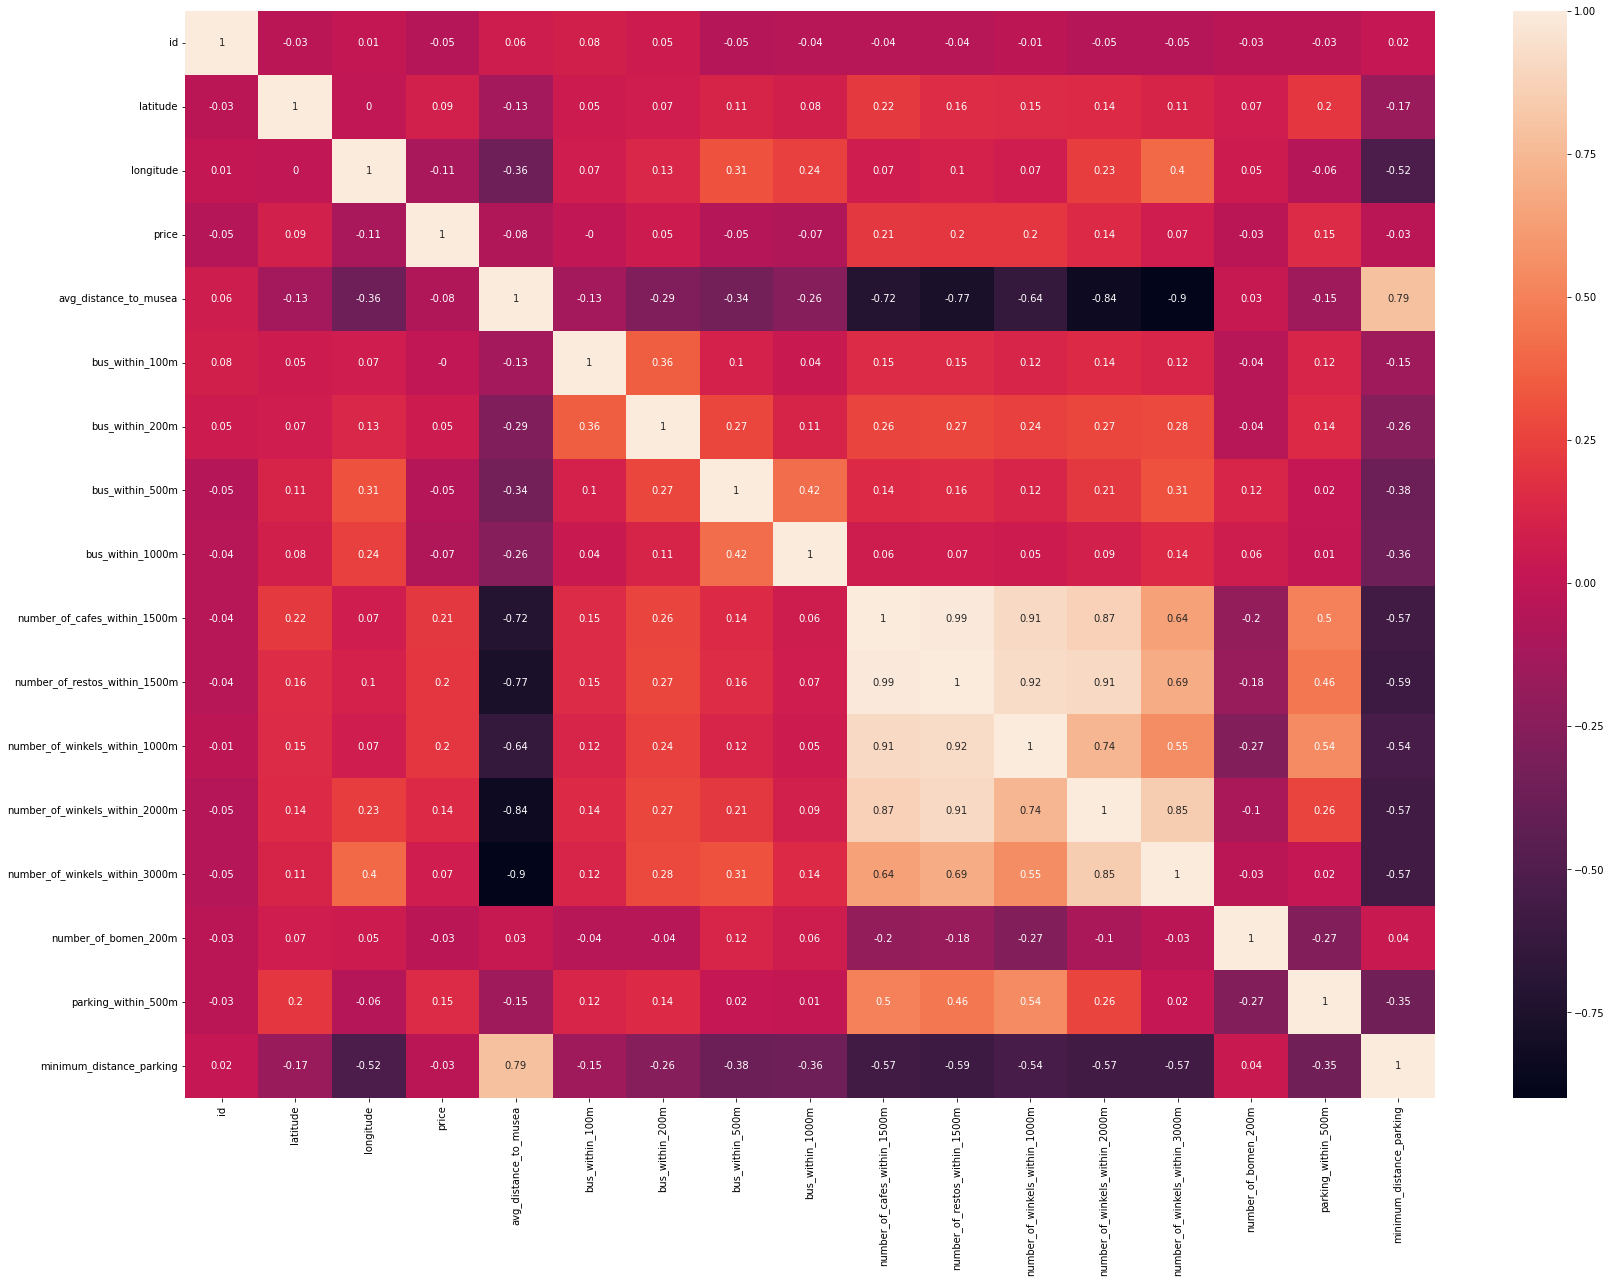

In [39]:
correlation_matrix = data_cleaned.corr().round(2)
plt.figure(figsize=(28,20))
sns.heatmap(data=correlation_matrix, annot=True)

If the listing is closer to a museum and so more in the center of Ghent, we can assume that the price will be higher. We can in some way see in the scatterplot that the price drops, when the distance grows. The same conclusion can be made for the number of trees. This is in accordance with our prediction.  
In the plot of the presence of a bus stop within 500 meters, we can see that listings without a bus stop tend to have a lower price.  
Finally we can conclude that the distance to restaurants, cafes and shops doesn't really have a direct impact on the price.

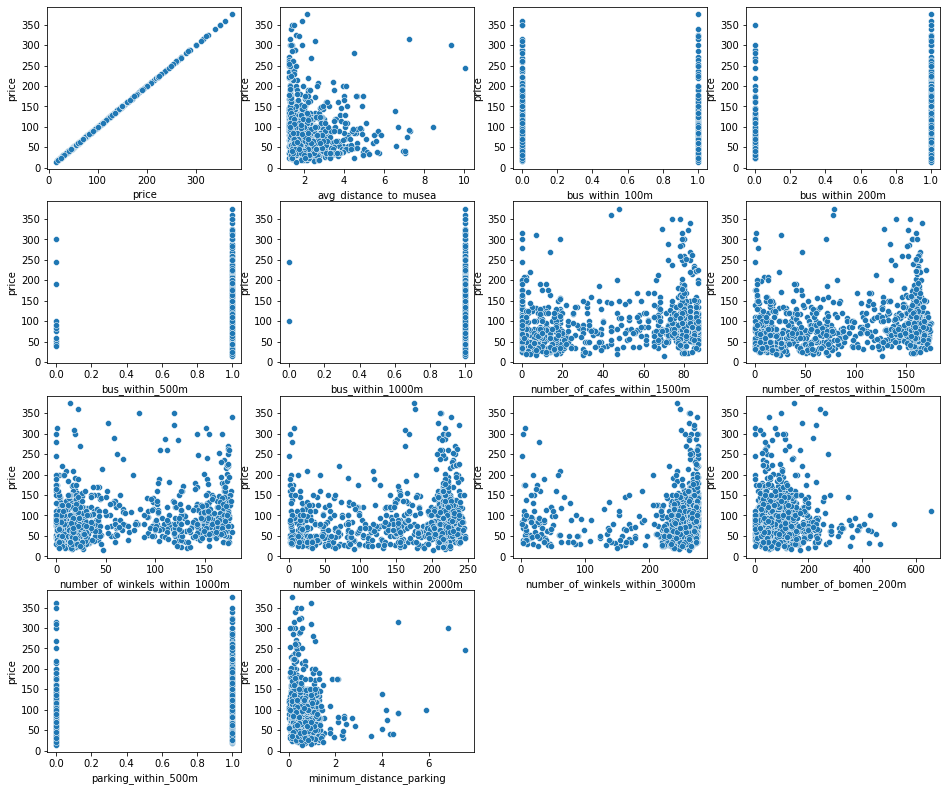

In [47]:
# Plots of the correlations between feature values and the price of listings.

plotKeys = data_cleaned
plotKeys = plotKeys.drop(columns=['id', 'latitude', 'longitude'])
plt.figure(figsize=(16,28))
for i, k in enumerate(plotKeys.keys()):
    plt.subplot(8, 4, 1+i)
    sns.scatterplot(x=plotKeys[k], y=plotKeys["price"])

In the boxplots below we can see that a comparision with the price for this criteria is difficult.  
On the other hand this gives us the insight that almost every listing has an bus stop withing 200 meter.

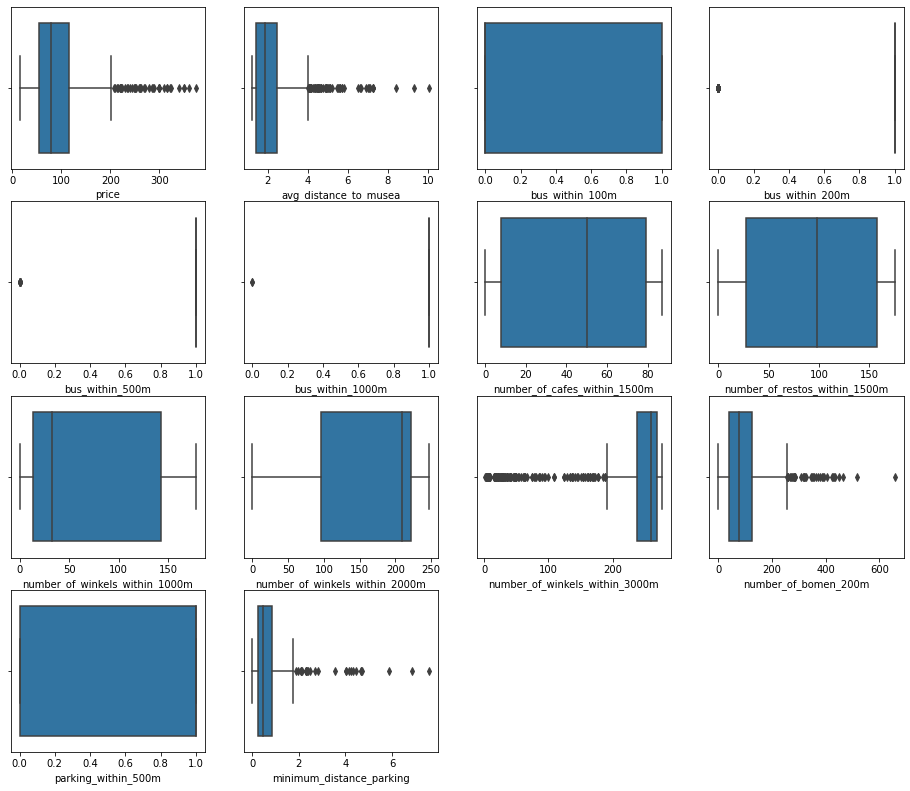

In [48]:
# Box plots of features to see if there are extreme outliers.

box = data_cleaned
box = box.drop(columns=['id', 'longitude', 'latitude'])

plt.figure(figsize=(16,28))
for i, k in enumerate(box.keys()):
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=box[k])